In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# für interactive Plots in jupyter notebooks
%matplotlib notebook

# Clustering der Bank Daten mittels dem RFM Modell

Einlesen der Bankdaten und da wir die Attribute 'gender', 'merchant', 'category','age' in diesem Beispiel nicht brauchen verwerfen wir sie direkt

In [2]:
file_name = '~/neuefische/data-fish/data/bank_transactions.csv'
data = pd.read_csv(file_name) 

In [3]:
data.drop(['gender', 'merchant', 'category','age'], axis=1, inplace=True)

In [4]:
data.head()

,step,customer,amount,fraud
0,0,C1093826151,4.55,0
1,0,C352968107,39.68,0
2,0,C2054744914,26.89,0
3,0,C1760612790,17.25,0
4,0,C757503768,35.72,0


---

## RFM Modell

Das RFM-Modell ist ein Modell das häufig verwendet wird, um die "Kundenqualität" zu beziffern. RFM steht für recency-frequency-monetary. Das Modell stellt also das Kundenqualität als eine Kombination der drei Attribute Aktualität, Häufigkeit und Umsatz dar.

https://en.wikipedia.org/wiki/RFM_(customer_value)

Wir wollen dieses Modell etwas zweckentfremden und auf die Bankkunden anwenden. Dazu müssen wir aus den Transaktionsdaten für jeden Kunden die oben genannten drei Attribute "berechnen". Anders ausgedrückt, wir wollen für jeden Kunden die drei Feature 'recency', 'frequency' und 'mean amount' berechnen.

---

**Aufgabe**
- Berechne die drei Features "frequency", "recency", "mean-amount" pro customer
- Visualisiere die Daten in einem 3D-Plot
- Benutze K-Means um die Daten zu clustern
- Visualisiere Fraud und die Cluster in den 3D-Plots

---

## Feature

In [5]:
mean_values = data.groupby('customer').mean().drop(['step'], axis=1)
fraud_values = data.groupby('customer').sum().drop(['step','amount'], axis=1).rename(index=str, columns={"fraud": "fraud_absolute"})
max_values = data.groupby('customer').max().drop(['amount', 'fraud'], axis=1).rename(index=str, columns={"step": "recency"})
count_values = data.groupby('customer').count().drop(['amount', 'fraud'], axis=1).rename(index=str, columns={"step": "frequency"})

In [6]:
rfm_data = pd.concat([mean_values, max_values, count_values, fraud_values], axis=1, sort=False)
rfm_data['recency'] = 179 - rfm_data['recency']

In [7]:
rfm_data.head()

,amount,fraud,recency,frequency,fraud_absolute
customer,,,,,
C1000148617,35.091908,0.007634,0,131,1
C100045114,90.336239,0.045872,0,109,5
C1000699316,38.154894,0.000000,6,94,0
C1001065306,204.754667,0.366667,24,30,11
C1002658784,34.253282,0.000000,0,131,0


### 3D Plots

Die Tatsache, dass das RFM-Modell nur auf drei Attributen basiert sollten wir für das Plotten nutzen.

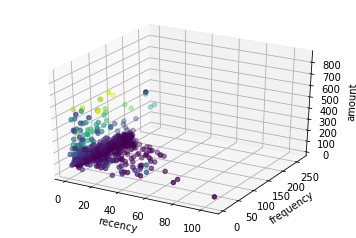

In [8]:
fig = plt.figure().gca(projection='3d')
fig.set_xlabel('recency')
fig.set_ylabel('frequency')
fig.set_zlabel('amount')
fig.scatter(rfm_data['recency'], rfm_data['frequency'], rfm_data['amount'], c=rfm_data['fraud']);

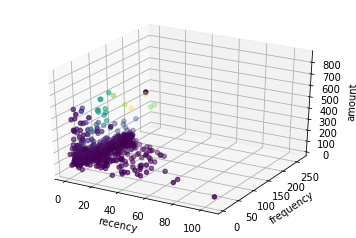

In [9]:
fig = plt.figure().gca(projection='3d')
fig.set_xlabel('recency')
fig.set_ylabel('frequency')
fig.set_zlabel('amount')
fig.scatter(rfm_data['recency'], rfm_data['frequency'], rfm_data['amount'], c=rfm_data['fraud_absolute']);

## K-Means

In [10]:
rfm_data_scaled = StandardScaler().fit_transform(rfm_data[['recency', 'frequency', 'amount']])

In [11]:
kmeans = KMeans(n_clusters=3)

In [12]:
kmeans.fit(rfm_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
rfm_data['cluster'] = kmeans.predict(rfm_data_scaled)

<IPython.core.display.Javascript object>


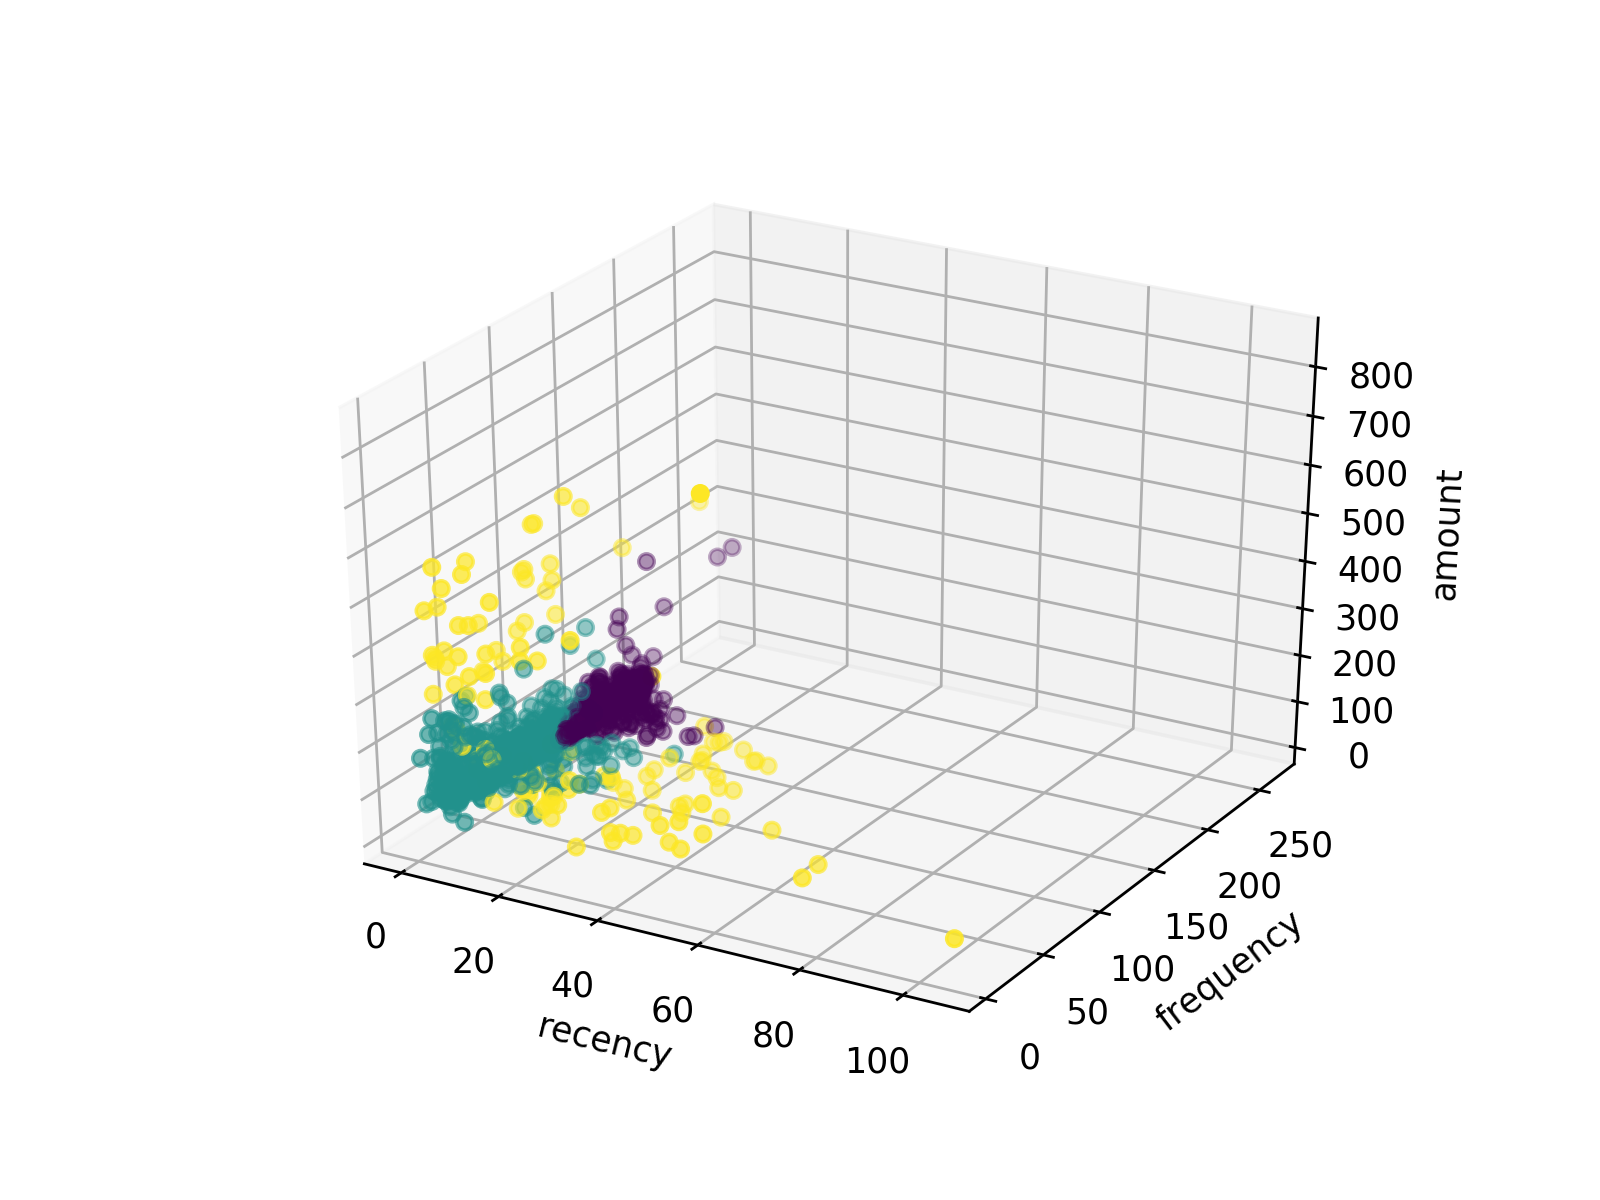

In [14]:
%matplotlib notebook
fig = plt.figure().gca(projection='3d')
fig.set_xlabel('recency')
fig.set_ylabel('frequency')
fig.set_zlabel('amount')
fig.scatter(rfm_data['recency'], rfm_data['frequency'], rfm_data['amount'], c=rfm_data['cluster']);